<a href="https://colab.research.google.com/github/manujha15/Daibetes-detection-machine-learning-project/blob/main/fakeNews.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import re
import string
from sklearn.preprocessing import LabelEncoder
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_fake=pd.read_csv("/content/drive/MyDrive/ml-projects/Fake.csv")
data_true=pd.read_csv("/content/drive/MyDrive/ml-projects/True.csv")

# **Preprocessing**

In [ ]:
data_fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
data_true.head(10)

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"
5,"White House, Congress prepare for talks on spe...","WEST PALM BEACH, Fla./WASHINGTON (Reuters) - T...",politicsNews,"December 29, 2017"
6,"Trump says Russia probe will be fair, but time...","WEST PALM BEACH, Fla (Reuters) - President Don...",politicsNews,"December 29, 2017"
7,Factbox: Trump on Twitter (Dec 29) - Approval ...,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
8,Trump on Twitter (Dec 28) - Global Warming,The following statements were posted to the ve...,politicsNews,"December 29, 2017"
9,Alabama official to certify Senator-elect Jone...,WASHINGTON (Reuters) - Alabama Secretary of St...,politicsNews,"December 28, 2017"


In [ ]:
data_fake['class']=0

In [ ]:
data_true['class']=1

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [ ]:
data_fake.shape

(23481, 5)

In [ ]:
data_true.shape

(21417, 5)

In [ ]:
data_fake_manual_testing=data_fake.tail(10)
for i in range(23480,23470,-1):
 data_fake.drop([i],axis=0,inplace=True)

In [ ]:
data_true_manual_testing=data_fake.tail(10)
for i in range(21416,21406,-1):
  data_true.drop([i],axis=0,inplace=True)

In [ ]:
data_fake.shape,data_true.shape

((23471, 5), (21407, 5))

In [ ]:
data_fake_manual_testing['class']=0
data_fake_manual_testing['class']=1

<ipython-input-84-1c0e76bc28e3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=0
<ipython-input-84-1c0e76bc28e3>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_fake_manual_testing['class']=1


In [ ]:
data_fake_manual_testing.head(20)

,title,text,subject,date,class
23471,Seven Iranians freed in the prisoner swap have...,"21st Century Wire says This week, the historic...",Middle-east,"January 20, 2016",1
23472,#Hashtag Hell & The Fake Left,By Dady Chery and Gilbert MercierAll writers ...,Middle-east,"January 19, 2016",1
23473,Astroturfing: Journalist Reveals Brainwashing ...,Vic Bishop Waking TimesOur reality is carefull...,Middle-east,"January 19, 2016",1
23474,The New American Century: An Era of Fraud,Paul Craig RobertsIn the last years of the 20t...,Middle-east,"January 19, 2016",1
23475,Hillary Clinton: ‘Israel First’ (and no peace ...,Robert Fantina CounterpunchAlthough the United...,Middle-east,"January 18, 2016",1
23476,McPain: John McCain Furious That Iran Treated ...,21st Century Wire says As 21WIRE reported earl...,Middle-east,"January 16, 2016",1
23477,JUSTICE? Yahoo Settles E-mail Privacy Class-ac...,21st Century Wire says It s a familiar theme. ...,Middle-east,"January 16, 2016",1
23478,Sunnistan: US and Allied ‘Safe Zone’ Plan to T...,Patrick Henningsen 21st Century WireRemember ...,Middle-east,"January 15, 2016",1
23479,How to Blow $700 Million: Al Jazeera America F...,21st Century Wire says Al Jazeera America will...,Middle-east,"January 14, 2016",1
23480,10 U.S. Navy Sailors Held by Iranian Military ...,21st Century Wire says As 21WIRE predicted in ...,Middle-east,"January 12, 2016",1


In [ ]:
data_true_manual_testing.head(20)

,title,text,subject,date,class
23461,REPORT: ‘Federal Government Escalated the Viol...,KILLED: Rancher and protest spokesman Robert ...,Middle-east,"January 28, 2016",0
23462,"BOILER ROOM – Oregon Standoff, Cuddle Parties,...",Tune in to the Alternate Current Radio Network...,Middle-east,"January 28, 2016",0
23463,"Eyewitness Says Feds Ambushed Bundys, 100 Shot...",Patrick Henningsen 21st Century Wire UPDATE: 1...,Middle-east,"January 27, 2016",0
23464,Episode #119 – SUNDAY WIRE: ‘You Know the Dril...,Episode #119 of SUNDAY WIRE SHOW finally resum...,Middle-east,"January 24, 2016",0
23465,‘There’ll be boots on the ground’: US making n...,21st Century Wire says Various parties in Wash...,Middle-east,"January 23, 2016",0
23466,Boston Brakes? How to Hack a New Car With Your...,21st Century Wire says For those who still ref...,Middle-east,"January 22, 2016",0
23467,Oregon Governor Says Feds ‘Must Act’ Against P...,"21st Century Wire says So far, after nearly 20...",Middle-east,"January 21, 2016",0
23468,Ron Paul on Burns Oregon Standoff and Jury Nul...,21st Century Wire says If you ve been followin...,Middle-east,"January 21, 2016",0
23469,BOILER ROOM: As the Frogs Slowly Boil – EP #40,Tune in to the Alternate Current Radio Network...,Middle-east,"January 20, 2016",0
23470,Arizona Rancher Protesting in Oregon is Target...,RTOne of the most visible members of the armed...,Middle-east,"January 20, 2016",0


In [ ]:
data_merge=pd.concat([data_fake,data_true],axis=0)
data_merge.head(10)

,title,text,subject,date,class
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0
5,Racist Alabama Cops Brutalize Black Boy While...,The number of cases of cops brutalizing and ki...,News,"December 25, 2017",0
6,"Fresh Off The Golf Course, Trump Lashes Out A...",Donald Trump spent a good portion of his day a...,News,"December 23, 2017",0
7,Trump Said Some INSANELY Racist Stuff Inside ...,In the wake of yet another court decision that...,News,"December 23, 2017",0
8,Former CIA Director Slams Trump Over UN Bully...,Many people have raised the alarm regarding th...,News,"December 22, 2017",0
9,WATCH: Brand-New Pro-Trump Ad Features So Muc...,Just when you might have thought we d get a br...,News,"December 21, 2017",0


In [ ]:
data_merge['class']=encoder.fit_transform(data_merge['class'])

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
data_merge['num_characters']=data_merge['text'].apply(len)

In [ ]:
data_merge['num_words']=data_merge['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [ ]:
data_merge['num_sentences']=data_merge['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

# **EDA**

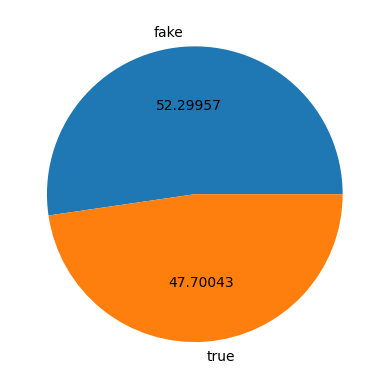

In [ ]:
plt.pie(data_merge['class'].value_counts(),labels=['fake','true'],autopct="%0.5f")
plt.show()

<Axes: xlabel='num_characters', ylabel='Count'>

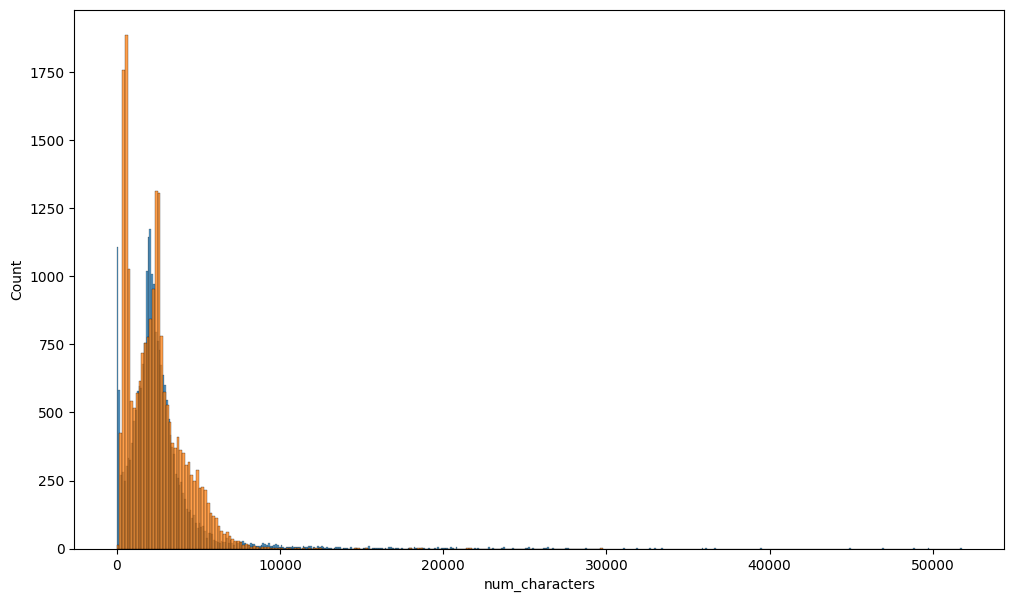

In [ ]:
plt.figure(figsize=(12,7))
sns.histplot(data_merge[data_merge['class']==0]['num_characters'])
sns.histplot(data_merge[data_merge['class']==1]['num_characters'])

<ipython-input-95-403983e87470>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data_merge.corr(),annot=True)


<Axes: >

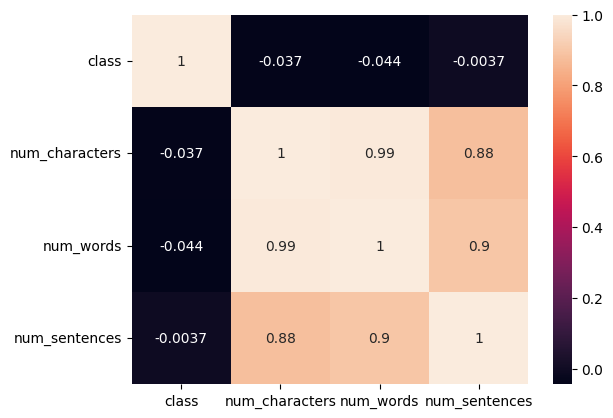

In [ ]:
sns.heatmap(data_merge.corr(),annot=True)

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
data_merge.columns

Index(['title', 'text', 'subject', 'date', 'class', 'num_characters',
       'num_words', 'num_sentences'],
      dtype='object')

In [ ]:
data_merge.drop(['title','subject','date'],axis=1,inplace=True)

In [ ]:


data_merge.isnull()

,text,class,num_characters,num_words,num_sentences
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,False,False,False
3,False,False,False,False,False
4,False,False,False,False,False
...,...,...,...,...,...
21402,False,False,False,False,False
21403,False,False,False,False,False
21404,False,False,False,False,False
21405,False,False,False,False,False


In [ ]:

data_merge.isnull().sum()

text              0
class             0
num_characters    0
num_words         0
num_sentences     0
dtype: int64

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
ps=PorterStemmer()
ps.stem('Adii I hate you mottu')

'adii i hate you mottu'

In [ ]:
def wordopt(text):
  text=text.lower()
  text=nltk.word_tokenize(text)

  y=[]
  for i in text:
    if i.isalnum():
      y.append(i)


      text=y[:]
      y.clear()

      for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
          y.append(i)

        text=y[:]
        y.clear()

        for i in text:
          y.append(ps.stem(i))

  return " ".join(y)

In [ ]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('loving')

'love'

In [ ]:
data_merge['wordopt']=data_merge['text'].apply(wordopt)

In [ ]:
wc=WordCloud(width=400 , height=400 , background_color='blue')

In [ ]:
fake_wc=wc.generate(data_merge[data_merge['class']==0]['text'].str.cat(sep=""))

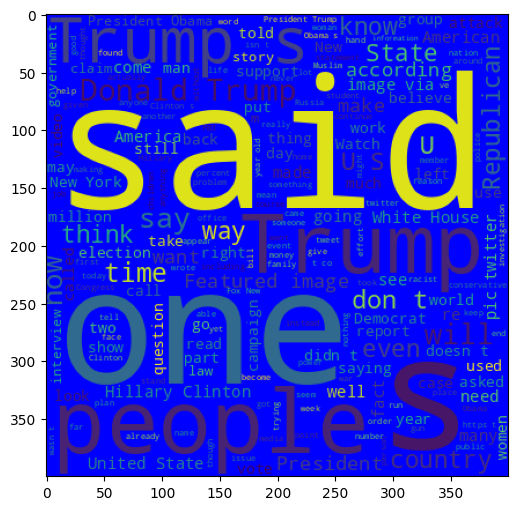

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

In [ ]:
true_wc=wc.generate(data_merge[data_merge['class']==1]['text'].str.cat(sep=""))

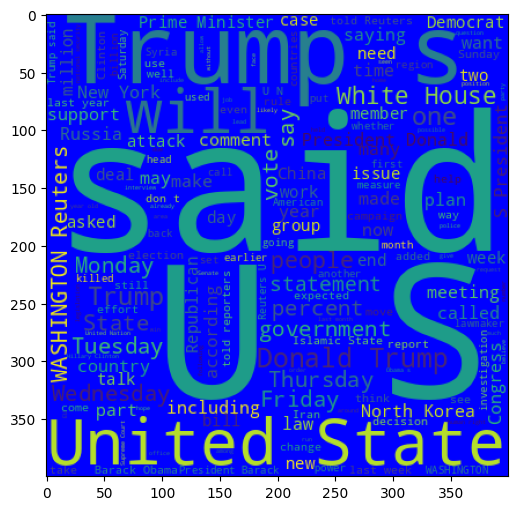

In [ ]:
plt.figure(figsize=(15,6))
plt.imshow(fake_wc)

In [ ]:
data=data_merge.sample(frac=1)

In [ ]:
data.head()

,text,class,num_characters,num_words,num_sentences
92,WASHINGTON (Reuters) - The Republican-controll...,1,3959,738,25
2172,"AUSTIN, Texas (Reuters) - A U.S. court struck ...",1,2041,367,13
2604,The judicial branch of our government is getti...,0,3607,668,26
5133,Donald Trump is so far-out and detached from r...,0,3395,610,10
4648,WASHINGTON (Reuters) - Attorney General Jeff S...,1,4968,867,31


In [ ]:
data.reset_index(inplace=True)
data.drop(['index'],axis=1,inplace=True)

In [ ]:
data.columns

Index(['text', 'class', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [ ]:
data.head(15)

,text,class,num_characters,num_words,num_sentences
0,WASHINGTON (Reuters) - The Republican-controll...,1,3959,738,25
1,"AUSTIN, Texas (Reuters) - A U.S. court struck ...",1,2041,367,13
2,The judicial branch of our government is getti...,0,3607,668,26
3,Donald Trump is so far-out and detached from r...,0,3395,610,10
4,WASHINGTON (Reuters) - Attorney General Jeff S...,1,4968,867,31
5,A new poll of New Hampshire voters could show ...,0,2946,549,13
6,NAIROBI (Reuters) - A French IT company that s...,1,2071,388,15
7,There s no lengths lying conservative media wo...,0,2301,454,19
8,J.R. Smith 21st Century WireMuch has been made...,0,12820,2272,52
9,CAIRO (Reuters) - An Egyptian military officer...,1,1126,209,9


In [ ]:
x=data['text'].astype(str)

In [ ]:
y=data['class'].astype(int)

# **train test split**

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer
tfidf=TfidfVectorizer(max_features=3000)

# **Model Building**

In [ ]:
def models(x_train,y_train):
  from sklearn.linear_model import LogisticRegression
  log=LogisticRegression(random_state=0)
  log.fit(x_train,y_train)

  from sklearn.tree import DecisionTreeClassifier
  tree=   DecisionTreeClassifier(criterion='entropy',random_state=0)
  tree.fit(x_train,y_train)

  from sklearn.ensemble import RandomForestClassifier
  forest=RandomForestClassifier(n_estimators=10,criterion='entropy',random_state=0)
  forest.fit(x_train,y_train)

  from sklearn.svm import SVC
  sv=SVC(random_state=0)
  sv.fit(x_train,y_train)

  from sklearn.neural_network import MLPClassifier
  mp=MLPClassifier(random_state=0)
  mp.fit(x_train,y_train)

  from sklearn.neighbors import KNeighborsClassifier
  KN=KNeighborsClassifier()
  KN.fit(x_train,y_train)

  from xgboost import XGBClassifier
  XG=XGBClassifier(random_state=0)
  XG.fit(x_train,y_train)

  print('[0]Logistic regression Training Accuracy:', log.score(x_train,y_train))
  print('[1]Decision Tree Training Accuracy:',tree.score(x_train,y_train))
  print('[2]random Forest Training Accuracy:', forest.score(x_train,y_train))
  print('[3]SVC Training Accuracy:', sv.score(x_train,y_train))
  print('[4]MLP Classifier Accuracy:',mp.score(x_train,y_train))
  print('[5]K-Neighbors Classifier Training Accuracy:', KN.score(x_train,y_train))
  print('[6]XGB Classifier Training Accuracy:', XG.score(x_train,y_train))

  return log, tree, forest,sv, mp, KN, XG

In [ ]:
models=models(x_train,y_train)

In [ ]:
model=models(x_test,y_test)

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

for i in range(len(model)):
  print('Model',i)
  print(confusion_matrix(y_test,model[i].predict(x_test)))
  print(classification_report(y_test,model[i].predict(x_test)))

  print(accuracy_score(y_test,model[i].predict(x_test)))

In [ ]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(model,open('model.pkl','wb'))